In [1]:
import urllib.request as req
import urllib
import re
from bs4 import BeautifulSoup
import time
import os
import zipfile


#青空文庫 夏目漱石(person148)リストURL
url = "https://www.aozora.gr.jp/index_pages/person148.html#sakuhin_list_1"

card_nums =[]

save_folder = ".//作品//夏目漱石//"

if not os.path.isdir(save_folder):
    os.makedirs(save_folder)

def get_card_num():
    print(url)
    try:
        res = req.urlopen(url)
    except urllib.error.HTTPError as e:
        print('raise HTTPError')
        print(e.reason)
    except urllib.error.URLError as e:
        print('raise URLError')
        print(e.reason)
    else:
        print(res.status)

    soup = BeautifulSoup(res, "html.parser")

    first_ol_element = soup.find('ol')

    for element in first_ol_element.find_all('li'): 
        sakuhin  = element.text
        #print(sakuhin)
        title_name = re.search(r'(.*)(（)',sakuhin)
        #print(title_name.group(1))
        card_num =re.search(r'作品ID：([//d:]+)',sakuhin)
        #print(card_num.group(1))
        card_nums.append(card_num.group(1))

get_card_num()

file_names = []

for card_num in card_nums:
    print(card_num)
    card_url = "https://www.aozora.gr.jp/cards/000148/card" + str(card_num) + ".html"
    print(card_url)
    try:
        res = req.urlopen(card_url)
    except urllib.error.HTTPError as e:
        print('raise HTTPError')
        print(e.reason)
        continue
    except urllib.error.URLError as e:
        print('rase URLError')
        print(e.reason)
        continue
    else:
        print(res.status)

    soup = BeautifulSoup(res, "html.parser")

    download_table = soup.find('table', {'class':'download'})
    #print(download_table)
    download_path = download_table.select_one("tr:nth-of-type(2) td:nth-of-type(3)").get_text()
    #print(download_path)
    file_names.append(download_path)
    time.sleep(1)

save_folder = ".//作品//夏目漱石//"

download_folder = save_folder + "zip//"
if not os.path.isdir(download_folder):
    os.makedirs(download_folder)

for file_name in file_names:
    print(file_name)
    download_file_url = "https://www.aozora.gr.jp/cards/000148/files/" + file_name
    local = download_folder + file_name
    if not os.path.exists(local):
        print("{0}のZIPファイルをダウンロード".format(file_name))
        try:
            download_data = urllib.request.urlopen(download_file_url).read()
        except urllib.error.HTTPError as e:
            print('raise HTTPError')
            print(e.reason)
            continue
        except urllib.error.URLError as e:
            print('rase URLError')
            print(e.reason)
            continue
        else:
            print(res.status)
            res.close()

        with open(local, mode="wb") as f:
            f.write(download_data)

        time.sleep(1)
    else:
        print("{0}のファイルはダウンロード済みです。".format(file_name))


zip_files = os.listdir(download_folder)

unzip_folder = save_folder + "unzip//"
if not os.path.isdir(unzip_folder):
    os.makedirs(unzip_folder)

unzip_filenames = []

for zip_file in zip_files:
    if ".zip" in zip_file:
        print("{0}のファイルを解凍します。".format(zip_file))
        zip_file_path = download_folder + zip_file
        with zipfile.ZipFile(zip_file_path, 'r') as z:
            for info in z.infolist():
                info.filename = info.filename.encode('shift_jis').decode('utf-8')
                z.extract(info, path=unzip_folder)
                unzip_filenames.append(info.filename)

utf8_folder = save_folder + "utf8//"
if not os.path.isdir(utf8_folder):
    os.makedirs(utf8_folder)

for unzip_filename in unzip_filenames:
    if os.path.isfile(unzip_folder + unzip_filename):
        if not os.path.isfile(utf8_folder + unzip_filename):
            sr_file = open((unzip_folder + unzip_filename), 'r',encoding='shift_jis')
            dt_file = open((utf8_folder + unzip_filename), 'w',encoding='utf-8')
            for row in sr_file:
                dt_file.write(row)

            sr_file.close
            dt_file.close
            print("{0}ファイルの文字コードをUTF8に変換しました。".format(unzip_filename))
        else:
            print("{0}ファイルは既に文字コード変換されています。".format(unzip_filename))
    else:
        print("{0}ファイルが存在しません。".format(unzip_filename))



https://www.aozora.gr.jp/index_pages/person148.html#sakuhin_list_1
200
2314
https://www.aozora.gr.jp/cards/000148/card2314.html
200
1086
https://www.aozora.gr.jp/cards/000148/card1086.html
200
758
https://www.aozora.gr.jp/cards/000148/card758.html
200
2669
https://www.aozora.gr.jp/cards/000148/card2669.html
200
59017
https://www.aozora.gr.jp/cards/000148/card59017.html
200
792
https://www.aozora.gr.jp/cards/000148/card792.html
200
1046
https://www.aozora.gr.jp/cards/000148/card1046.html
200
769
https://www.aozora.gr.jp/cards/000148/card769.html
200
2383
https://www.aozora.gr.jp/cards/000148/card2383.html
200
760
https://www.aozora.gr.jp/cards/000148/card760.html
200
2674
https://www.aozora.gr.jp/cards/000148/card2674.html
200
58276
https://www.aozora.gr.jp/cards/000148/card58276.html
200
2670
https://www.aozora.gr.jp/cards/000148/card2670.html
200
778
https://www.aozora.gr.jp/cards/000148/card778.html
200
777
https://www.aozora.gr.jp/cards/000148/card777.html
200
55936
https://www.aozo

In [4]:
# 生成するC言語のソースコード
c_code = """
#include <stdio.h>

int main() {
    printf("Hello, World!////n");
    return 0;
}
"""

# C言語のソースコードをファイルに書き込む
file_path = 'hello_world.c'

with open(file_path, 'w') as file:
    file.write(c_code)

print(f"C言語のソースコードが{file_path}に生成されました。")


C言語のソースコードがhello_world.cに生成されました。


In [5]:
import requests

url="https://www.uniprot.org/uniprot/"

params={
    "query":"organism:human AND gene_exact:TP53",
    "query":"reviewed:yes AND organism://Homo sapiens// AND gene_exact:TP53",
    "format":"tab",
    "columns":"id,genes(PREFERRED),sequence"
}

response = requests.get(url=url, params=params)


response.text

'{"timestamp":"2025-05-03T09:33:33.987+00:00","status":404,"error":"Not Found","path":"/uniprotkb/query=reviewed:yes%20AND%20organism:/Homo%20sapiens/%20AND%20gene_exact:TP53&format=tab&columns=id,genes(PREFERRED),sequence"}'

In [8]:
pip install biopython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------------------------- ------ 2.4/2.8 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from tqdm import tqdm
from Bio import Entrez
 
Entrez.email = "worktask1124@outlook.jp"
 
pmids = []
term = 'Randomized+Controlled+Trial[pt]'
db='pubmed'
retmax = 1000
 
handle = Entrez.esearch(db='pubmed',term='Randomized+Controlled+Trial[pt]')
record = Entrez.read(handle)
count = int(record['Count'])
 
for retstart in tqdm(range(0, count, retmax)):
    handle = Entrez.esearch(db=db, term=term, retmax=retmax, retstart=retstart)
    record = Entrez.read(handle)
    pmids.extend(record['IdList'])

  2%|█▎                                                                               | 10/635 [00:10<10:29,  1.01s/it]


RuntimeError: Search Backend failed: Exception:
'retstart' cannot be larger than 9998. For PubMed, ESearch can only retrieve the first 9,999 records matching the query. To obtain more than 9,999 PubMed records, consider using EDirect that contains additional logic to batch PubMed search results automatically so that an arbitrary number can be retrieved. For details see https://www.ncbi.nlm.nih.gov/books/NBK25499/

In [408]:
import os
import pandas as pd
import numpy as np

def walk_genome(path):
    dirbox=[[] for _ in range(5)]
    for dpath,dname,fname in os.walk(path):
        dirbox[0].append(dpath)
        dirbox[1].append(dname)
        dirbox[2].append(fname)
        for files in fname:
            dirbox[3].append(dpath.replace('////','//')+'//'+files)
        for dp in dirbox[3]:
            with open(dp,'r',encoding='utf-8')as file:
                dirbox[4].append(file.read())

    p_d=dirbox[4][20].split('\n')
    single_data=[]
    data=[]
    map_d={}
    for i in range(1,len(p_d)):
        data.append([p_d[i][j:j+3]for j in range(0,len(p_d[i]),3) ])
        # map_d[str(i)]=data
    return data

walk_genome('C://Users//workt//Downloads//ncbi_dataset')

def analys_amino(path):
    # walk_genome(path)
    # AUA
    amino={
        'U':{
        "フェニルアラニン":[],
        "ロイシンU":[],
        "ロイシンC":[],
        "イソロイシン":[],
        "メチオ二ン":[],
        "バリン":[],
        },'C':{
        "セリン":[],
        "プロリン":[],
        "トレオニン":[],
        "アラニン":[],
        },'A':{
        "チロシン":[],
        "ヒスチジン":[],
        "グルタミン":[],
        "アスパラギン":[],
        "リジン":[],
        "アスパラギン酸":[],
        "グルタミン酸":[],
        },'G':{
        "システイン":[],
        "トリプトファン":[],
        "アルギニンC":[],
        "セリン":[],
        "アルギニンA":[],
        "グリシン":[],
        }
        }
    word=['U','C','A','G']
    list(map(lambda k:[k[1][key]
                       .append(k[0]+word[1]+word[3]) 
         for id,key in enumerate(k[1].keys())]
         ,amino.items()))
    n=np.arange(0,64).reshape(4,16)
    return n.T
analys_amino('')

array([[ 0, 16, 32, 48],
       [ 1, 17, 33, 49],
       [ 2, 18, 34, 50],
       [ 3, 19, 35, 51],
       [ 4, 20, 36, 52],
       [ 5, 21, 37, 53],
       [ 6, 22, 38, 54],
       [ 7, 23, 39, 55],
       [ 8, 24, 40, 56],
       [ 9, 25, 41, 57],
       [10, 26, 42, 58],
       [11, 27, 43, 59],
       [12, 28, 44, 60],
       [13, 29, 45, 61],
       [14, 30, 46, 62],
       [15, 31, 47, 63]])

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))


In [8]:
import torch
import torch.nn as nn

transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)
output = transformer_model(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)

NameError: name 'src_mask' is not defined

In [12]:
import tensorflow as tf

x = [[[1.0, 2.0, 3.0],
      [4.0, 5.0, 6.0]],
    [[7.0, 8.0, 9.0],
      [10.0, 11.0, 12.0]]]
tf.image.adjust_brightness(x, delta=0.1)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[ 1.1,  2.1,  3.1],
        [ 4.1,  5.1,  6.1]],

       [[ 7.1,  8.1,  9.1],
        [10.1, 11.1, 12.1]]], dtype=float32)>

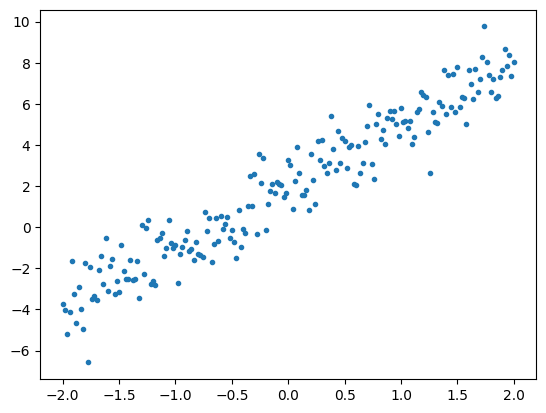

In [14]:
import tensorflow as tf

import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = f(x) + noise

# Plot all the data
plt.plot(x, y, '.')
plt.show()

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 123, 123, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 121, 121, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,680 (45.62 KB)

 Trainable params: 11,680 (45.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 123, 123, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 121, 121, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 36, 36, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,672 (190.12 KB)

 Trainable params: 48,672 (190.12 KB)

 Non-trainable params: 0 (0.00 B)

['Assembly Accession\tAssembly Name\tOrganism Name\tOrganism Infraspecific Names Breed\tOrganism Infraspecific Names Strain\tOrganism Infraspecific Names Cultivar\tOrganism Infraspecific Names Ecotype\tOrganism Infraspecific Names Isolate\tOrganism Infraspecific Names Sex\tAnnotation Name\tAssembly Stats Total Sequence Length\tAssembly Level\tAssembly Release Date\tWGS project accession\tAssembly Stats Number of Scaffolds\nGCA_000001405.29\tGRCh38.p14\tHomo sapiens\t\t\t\t\t\t\t\t3099734149\tChromosome\t2022-02-03\t\t473\nGCF_000001405.40\tGRCh38.p14\tHomo sapiens\t\t\t\t\t\t\tGCF_000001405.40-RS_2024_08\t3099441038\tChromosome\t2022-02-03\t\t470\nGCA_009914755.4\tT2T-CHM13v2.0\tHomo sapiens\t\t\t\t\t\t\t\t3117275501\tComplete Genome\t2022-01-24\t\t24\nGCF_009914755.1\tT2T-CHM13v2.0\tHomo sapiens\t\t\t\t\t\t\tGCF_009914755.1-RS_2024_08\t3117275501\tComplete Genome\t2022-01-24\t\t24\nGCA_018852615.3\thg002v1.1.mat\tHomo sapiens\t\t\t\t\tNA24385\tmale\t\t3051512984\tChromosome\t2024-07-1